## Cross-validation
Uses multiple train-test splits, not just a single one. Each split used to train & evaluate a separate model. Results are averaged over multiple different training sets instead of relying on a single model trained on a particular training set.

**Stratified Cross-validation:** In Stratified folds each  fold contain a proportion of classes that matches the overall dataset.  Now, all classes will be fairly represented in the test set.

**Validation Curve:**  The validation curve shows the mean cross-validation accuracy for training and test sets.  It also shows the variation around the k-fold cross-validation scores.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [3]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/home/navjot/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9555555555555556

In [4]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9833333333333333

In [5]:
rf = RandomForestClassifier(n_estimators=130)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9703703703703703

If we use train-test-split, it divides the data randomly so model can give different result everytime.

In [6]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [7]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)    

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [8]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [9]:
#StratifiedKFold-When you are seperating out the folds, it will divide each classification category in uniform way
from sklearn.model_selection import StratifiedKFold
SkFold = StratifiedKFold(n_splits=3)

In [10]:
scores_l = []
scores_svm = []
scores_rf = []

for train_index, test_index in kf.split(digits.data):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]
    scores_l.append(get_score(LogisticRegression(solver = 'liblinear'), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))

In [11]:
scores_l

[0.8964941569282137, 0.9515859766277128, 0.9115191986644408]

In [12]:
scores_svm

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [13]:
scores_rf

[0.9398998330550918, 0.9499165275459098, 0.9248747913188647]

**cross_val_score:** this will do the exact same thing as it was done in above steps, ie, splitting data in folds, fitting the model and returning the score on test data.

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
cross_val_score(LogisticRegression(solver='liblinear'), digits.data, digits.target)

array([0.92222222, 0.88333333, 0.95264624, 0.95821727, 0.89415042])

In [16]:
cross_val_score(SVC(), digits.data, digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [17]:
cross_val_score(RandomForestClassifier(), digits.data, digits.target)

array([0.92777778, 0.91111111, 0.94707521, 0.9637883 , 0.91086351])

In [46]:
from sklearn.model_selection import validation_curve
import numpy as np
param_range = np.logspace(-10,10,11)
train_scores, test_scores= validation_curve(SVC(), digits.data, digits.target, param_name="gamma",param_range=param_range, cv=3)

In [47]:
print(train_scores)
print(test_scores)

[[0.27963272 0.10183639 0.10183639]
 [0.28130217 0.10183639 0.10183639]
 [0.28213689 0.10183639 0.10183639]
 [0.97829716 0.97746244 0.98497496]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]]
[[0.29382304 0.10183639 0.10183639]
 [0.29215359 0.10183639 0.10183639]
 [0.29215359 0.10183639 0.10183639]
 [0.94991653 0.96327212 0.93155259]
 [0.65275459 0.68447412 0.73789649]
 [0.20200334 0.10183639 0.10183639]
 [0.10016694 0.10183639 0.10183639]
 [0.10016694 0.10183639 0.10183639]
 [0.10016694 0.10183639 0.10183639]
 [0.10016694 0.10183639 0.10183639]
 [0.10016694 0.10183639 0.10183639]]


One row per parameter sweep value,One column per CV fold.

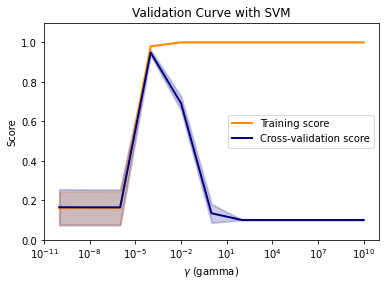

In [48]:
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()